In [0]:
#load fundamental libraary
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization

In [0]:
#load listinings data
dataset = pd.read_csv("/content/gdrive/My Drive/listings.csv")
dataset2 = pd.read_csv('/content/gdrive/My Drive/listings_summary.csv')

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Now, We oveview datasets and get significant features according to us. 

In [7]:
dataset.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141


In [8]:
#get significant features for according to me from this dataset and show 3 example
important_features = ["room_type","number_of_reviews","calculated_host_listings_count","availability_365","longitude","latitude","price"]
dataset = dataset[important_features]
dataset.head(1)

,room_type,number_of_reviews,calculated_host_listings_count,availability_365,longitude,latitude,price
0,Entire home/apt,118,4,141,13.402557,52.534537,60


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 7 columns):
room_type                         22552 non-null object
number_of_reviews                 22552 non-null int64
calculated_host_listings_count    22552 non-null int64
availability_365                  22552 non-null int64
longitude                         22552 non-null float64
latitude                          22552 non-null float64
price                             22552 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.2+ MB


There is no null data in listining.csv. It is good news for us :)

In [10]:
dataset2.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,...,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76


In [11]:
#get significant features for according to me from this dataset and show 3 example
get_features = ["cancellation_policy","host_identity_verified","amenities","security_deposit",
                "cleaning_fee","guests_included","extra_people","review_scores_rating",
               "bathrooms","bedrooms","beds","bed_type","accommodates"]
dataset2 = dataset2[get_features]
dataset2.head()

,cancellation_policy,host_identity_verified,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,bathrooms,bedrooms,beds,bed_type,accommodates
0,strict_14_with_grace_period,t,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",$200.00,$30.00,1,$28.00,93.0,1.0,1.0,2.0,Real Bed,3
1,flexible,t,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",$0.00,$0.00,1,$0.00,100.0,1.0,1.0,1.0,Real Bed,2
2,strict_14_with_grace_period,t,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",$200.00,$50.00,2,$20.00,92.0,1.0,1.0,2.0,Real Bed,4
3,strict_14_with_grace_period,t,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",$250.00,$30.00,1,$18.00,88.0,1.0,1.0,1.0,Pull-out Sofa,2
4,moderate,t,"{Wifi,Heating,""Family/kid friendly"",Essentials...",$0.00,$0.00,1,$24.00,96.0,1.0,1.0,2.0,Real Bed,2


In [12]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 13 columns):
cancellation_policy       22552 non-null object
host_identity_verified    22526 non-null object
amenities                 22552 non-null object
security_deposit          13191 non-null object
cleaning_fee              15406 non-null object
guests_included           22552 non-null int64
extra_people              22552 non-null object
review_scores_rating      18163 non-null float64
bathrooms                 22520 non-null float64
bedrooms                  22534 non-null float64
beds                      22512 non-null float64
bed_type                  22552 non-null object
accommodates              22552 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.2+ MB


<h4>What We learn ?</h4>

* We have 22552 sample. 

Feature contains null;
* host_identity_verified
* security_deposit
* cleaning_fee
* review_scores_rating
* bathrooms
* bedrooms
* beds


We need handle this feature. Also We can create new features from exist features. Example; We can create distance from latitude and longtitude. This feature response this question. "How far is Home/Flat to Berlin ?" 

Let's Start!!

<h3>Working on listings.csv dataset</h3>

In [0]:
#create distance feature from latitude and longtitude 
from geopy.distance import great_circle
def distance_from_berlin(lat, lon):
    berlin_centre = (52.5027778, 13.404166666666667)
    record = (lat, lon)
    return great_circle(berlin_centre, record).km

#add distanse dataset
dataset['distance'] = dataset.apply(lambda x: distance_from_berlin(x.latitude, x.longitude), axis=1)

del dataset['latitude']
del dataset['longitude']

In [0]:
#convert room_type string to category
def set_room_type(x):
    if x=="Private room":
        return 1
    else:
        return 0
    
dataset["room_type"] = list(map(set_room_type,dataset["room_type"]))
dataset["room_type"] = dataset["room_type"].astype("category")


In [15]:
dataset.head(3)

,room_type,number_of_reviews,calculated_host_listings_count,availability_365,price,distance
0,0,118,4,141,60,3.533182
1,1,6,1,0,17,5.085573
2,0,143,1,220,90,3.695677


<h3>Working on listings_summary.csv dataset</h3>

We need fill and transforming features. 

My strategy is;

Some values are too much in the dataset. That's why I filled the minority nan values with it.
You can determine your own strategy.

In [16]:
percent = dataset2.bathrooms.value_counts(dropna=False)[1.0]/sum(dataset2.bathrooms.value_counts(dropna=False))
print("1.0 in percentage of bathrooms data :",percent)

1.0 in percentage of bathrooms data : 0.8782813054274565


1.0 is %87 so I will fill nan values with 1.0

In [0]:
#fill na in bathroom
dataset2.bathrooms = dataset2.bathrooms.fillna(1.0)

In [18]:
percent = dataset2.bedrooms.value_counts(dropna=False)[1.0]/sum(dataset2.bedrooms.value_counts(dropna=False))
print("1.0 in percentage of bedrooms data :",percent)

1.0 in percentage of bedrooms data : 0.7610854913089748


In [0]:
#fill na in bedrooms
dataset2.bedrooms = dataset2.bedrooms.fillna(1.0)

In [20]:
percent = dataset2.beds.value_counts(dropna=False)[1.0]/sum(dataset2.beds.value_counts(dropna=False))
print("1.0 in percentage of beds data :",percent)

1.0 in percentage of beds data : 0.6354203618304364


In [0]:
#fill na in bedrooms
dataset2.beds = dataset2.beds.fillna(1.0)

We need transform some feature for machine learning models.

In [22]:
dataset2.bed_type.value_counts(dropna=False)

Real Bed         21766
Pull-out Sofa      451
Futon              240
Couch               72
Airbed              23
Name: bed_type, dtype: int64

In [0]:
d = {"Real Bed":0,
     "Pull-out Sofa":1,
     "Futon":2,
     "Couch":3,
     "Airbed":4}

def fill_beds(n):
    return d[n]

dataset2.bed_type = list(map(fill_beds,dataset2.bed_type))
dataset2.bed_type = dataset2.bed_type.astype("category")
    

In [24]:
dataset2.cancellation_policy.value_counts(dropna=False)

flexible                       9102
moderate                       7096
strict_14_with_grace_period    6287
super_strict_30                  53
super_strict_60                  14
Name: cancellation_policy, dtype: int64

In [0]:

d = {"flexible":0,
     "moderate":1,
     "strict_14_with_grace_period":2,
     "super_strict_30":3,
     "super_strict_60":4}

def fill_policy(n):
    return d[n]

dataset2.cancellation_policy = list(map(fill_policy,dataset2.cancellation_policy))
dataset2.cancellation_policy = dataset2.cancellation_policy.astype("category")

In [26]:
print(dataset2.host_identity_verified.value_counts(dropna=False))
dataset2.host_identity_verified.fillna("f", inplace=True)
print("Nan filled with f")

f      13824
t       8702
NaN       26
Name: host_identity_verified, dtype: int64
Nan filled with f


In [0]:
d = {"f":0,
     "t":1}

def fill_identity(n):
    return d[n]

dataset2.host_identity_verified = list(map(fill_identity,dataset2.host_identity_verified))
dataset2.host_identity_verified = dataset2.host_identity_verified.astype("category")

In [0]:
#I think amenties count can be useful
dataset2.amenities = [len(i) for i in dataset2.amenities]

In [29]:
dataset2.head()

,cancellation_policy,host_identity_verified,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,bathrooms,bedrooms,beds,bed_type,accommodates
0,2,1,407,$200.00,$30.00,1,$28.00,93.0,1.0,1.0,2.0,0,3
1,0,1,120,$0.00,$0.00,1,$0.00,100.0,1.0,1.0,1.0,0,2
2,2,1,273,$200.00,$50.00,2,$20.00,92.0,1.0,1.0,2.0,0,4
3,2,1,521,$250.00,$30.00,1,$18.00,88.0,1.0,1.0,1.0,1,2
4,1,1,223,$0.00,$0.00,1,$24.00,96.0,1.0,1.0,2.0,0,2


We must clean this varaible. Because machine learning models not understand '$', ',' ex..

In [30]:
print("old val: ", dataset2.security_deposit[0])
#clean deposit
dataset2.security_deposit = list(map(lambda x: float(str(x).replace(',','').replace('$','')),dataset2.security_deposit))
print("cleaned val: ",dataset2.security_deposit[0])

old val:  $200.00
cleaned val:  200.0


In [31]:
print("old val: ",dataset2.cleaning_fee[0])
dataset2.cleaning_fee = list(map(lambda x: float(str(x).replace(',','').replace('$','')),dataset2.cleaning_fee))
print("cleaned val: ",dataset2.cleaning_fee[0])

old val:  $30.00
cleaned val:  30.0


We may need to identify different filling strategies based on different data.

According to the strategy I chose to apply now;

For example, let the values ​​range from 0 to 1000;
If 99% of the data consists of values ​​less than 50, nan values ​​are filled with the weighted average of values ​​less than 50.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


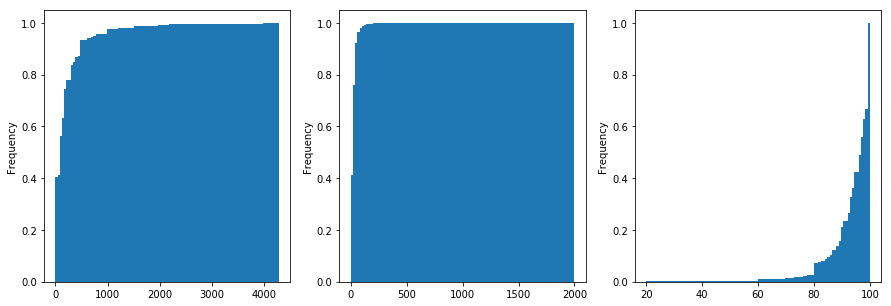

In [32]:
#security_deposit - cleaning_fee - review_scores_rating
f,ax = plt.subplots(figsize=(15,5),nrows=1,ncols=3)
dataset2.security_deposit.plot(kind="hist",bins=100,cumulative=True,normed=True,ax=ax[0])
dataset2.cleaning_fee.plot(kind="hist",bins=100,cumulative=True,normed=True,ax=ax[1])
dataset2.review_scores_rating.plot(kind="hist",bins=100,cumulative=True,normed=True,ax=ax[2])
plt.show()

For security_deposit, numbers less than 2000 represent the majority of data. According to my determined strategy, I will fill the nan values with the weighted average of less than 2000 values.

For cleaning_fee, numbers less than 250 represent the majority of data. According to my determined strategy, I will fill the nan values with the weighted average of less than 250 values.

For review_scores_rating, There is no anything values represent the majority of data. According to my determined strategy, I will fill the nan values with the general weighted average.

In [33]:
val = dataset2.security_deposit.value_counts(dropna=True)[0:2000]
indx = dataset2.security_deposit.value_counts(dropna=True)[0:2000].index
weightd_avg = (sum(val*indx))/sum(dataset2.security_deposit.value_counts(dropna=True)[0:2000])
weightd_avg = float(round(weightd_avg,2))
print("Filled security_deposit Nan with :",weightd_avg)

#fillna
dataset2.security_deposit = dataset2.security_deposit.fillna(weightd_avg)

Filled security_deposit Nan with : 171.54


In [34]:
val = dataset2.cleaning_fee.value_counts(dropna=True)[0:250]
indx = dataset2.cleaning_fee.value_counts(dropna=True)[0:250].index
weightd_avg = (sum(val*indx))/sum(dataset2.cleaning_fee.value_counts(dropna=True)[0:250])
weightd_avg = float(round(weightd_avg,2))
print("Filled cleaning_fee Nan with :",weightd_avg)

#fillna
dataset2.cleaning_fee = dataset2.cleaning_fee.fillna(weightd_avg)

Filled cleaning_fee Nan with : 26.05


In [35]:
val = dataset2.review_scores_rating.value_counts(dropna=True)
indx = dataset2.review_scores_rating.value_counts(dropna=True).index
weightd_avg = (sum(val*indx))/sum(dataset2.review_scores_rating.value_counts(dropna=True))
weightd_avg = float(round(weightd_avg,2))
print("Filled review_scores_rating Nan with :",weightd_avg)

#fillna
dataset2.review_scores_rating = dataset2.review_scores_rating.fillna(weightd_avg)

Filled review_scores_rating Nan with : 94.41


In [36]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 13 columns):
cancellation_policy       22552 non-null category
host_identity_verified    22552 non-null category
amenities                 22552 non-null int64
security_deposit          22552 non-null float64
cleaning_fee              22552 non-null float64
guests_included           22552 non-null int64
extra_people              22552 non-null object
review_scores_rating      22552 non-null float64
bathrooms                 22552 non-null float64
bedrooms                  22552 non-null float64
beds                      22552 non-null float64
bed_type                  22552 non-null category
accommodates              22552 non-null int64
dtypes: category(3), float64(6), int64(3), object(1)
memory usage: 1.8+ MB


The required feature engineering operations were done in our datasets. Now, We can concat two dataset.

In [52]:
#concat
data = pd.concat([dataset,dataset2],axis=1)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 19 columns):
room_type                         22552 non-null category
number_of_reviews                 22552 non-null int64
calculated_host_listings_count    22552 non-null int64
availability_365                  22552 non-null int64
price                             22552 non-null int64
distance                          22552 non-null float64
cancellation_policy               22552 non-null category
host_identity_verified            22552 non-null category
amenities                         22552 non-null int64
security_deposit                  22552 non-null float64
cleaning_fee                      22552 non-null float64
guests_included                   22552 non-null int64
extra_people                      22552 non-null object
review_scores_rating              22552 non-null float64
bathrooms                         22552 non-null float64
bedrooms                          22552 non-nu

In [0]:
#Remaining tranforming, cleaning proceses
data.host_identity_verified = [1 if i=='t' else 0 for i in data.host_identity_verified ]
data.extra_people =  list(map(lambda x: float(str(x).replace(',','').replace('$','')),data.extra_people)) 
data.host_identity_verified = data.host_identity_verified.astype("category")
data.extra_people = data.extra_people.astype(float)   

In [39]:
data.head()

,room_type,number_of_reviews,calculated_host_listings_count,availability_365,price,distance,cancellation_policy,host_identity_verified,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,bathrooms,bedrooms,beds,bed_type,accommodates
0,0,118,4,141,60,3.533182,2,0,407,200.0,30.0,1,28.0,93.0,1.0,1.0,2.0,0,3
1,1,6,1,0,17,5.085573,0,0,120,0.0,0.0,1,0.0,100.0,1.0,1.0,1.0,0,2
2,0,143,1,220,90,3.695677,2,0,273,200.0,50.0,2,20.0,92.0,1.0,1.0,2.0,0,4
3,1,25,1,297,26,3.755285,2,0,521,250.0,30.0,1,18.0,88.0,1.0,1.0,1.0,1,2
4,1,197,1,26,42,4.550423,1,0,223,0.0,0.0,1,24.0,96.0,1.0,1.0,2.0,0,2


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 19 columns):
room_type                         22552 non-null category
number_of_reviews                 22552 non-null int64
calculated_host_listings_count    22552 non-null int64
availability_365                  22552 non-null int64
price                             22552 non-null int64
distance                          22552 non-null float64
cancellation_policy               22552 non-null category
host_identity_verified            22552 non-null category
amenities                         22552 non-null int64
security_deposit                  22552 non-null float64
cleaning_fee                      22552 non-null float64
guests_included                   22552 non-null int64
extra_people                      22552 non-null float64
review_scores_rating              22552 non-null float64
bathrooms                         22552 non-null float64
bedrooms                          22552 non-n

In [41]:
data.describe()

,number_of_reviews,calculated_host_listings_count,availability_365,price,distance,amenities,security_deposit,cleaning_fee,guests_included,extra_people,review_scores_rating,bathrooms,bedrooms,beds,accommodates
count,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000
mean,17.840679,1.918233,79.852829,67.143668,4.547584,224.058221,189.488158,26.508394,1.332121,8.257716,94.413111,1.092564,1.161006,1.619457,2.637460
std,36.769624,3.667257,119.368162,220.266210,2.663421,149.056602,287.848598,25.283219,0.835034,11.151069,6.856020,0.329679,0.645914,1.174088,1.510548
min,0.000000,1.000000,0.000000,0.000000,0.198956,2.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,0.000000,30.000000,2.978093,121.000000,95.000000,15.000000,1.000000,0.000000,93.000000,1.000000,1.000000,1.000000,2.000000
50%,5.000000,1.000000,4.000000,45.000000,4.089426,185.000000,171.540000,26.050000,1.000000,5.000000,95.000000,1.000000,1.000000,1.000000,2.000000
75%,16.000000,1.000000,129.000000,70.000000,5.549060,286.000000,171.540000,30.000000,1.000000,15.000000,100.000000,1.000000,1.000000,2.000000,3.000000
max,498.000000,45.000000,365.000000,9000.000000,25.012109,1185.000000,4280.000000,2000.000000,16.000000,250.000000,100.000000,8.500000,12.000000,22.000000,16.000000


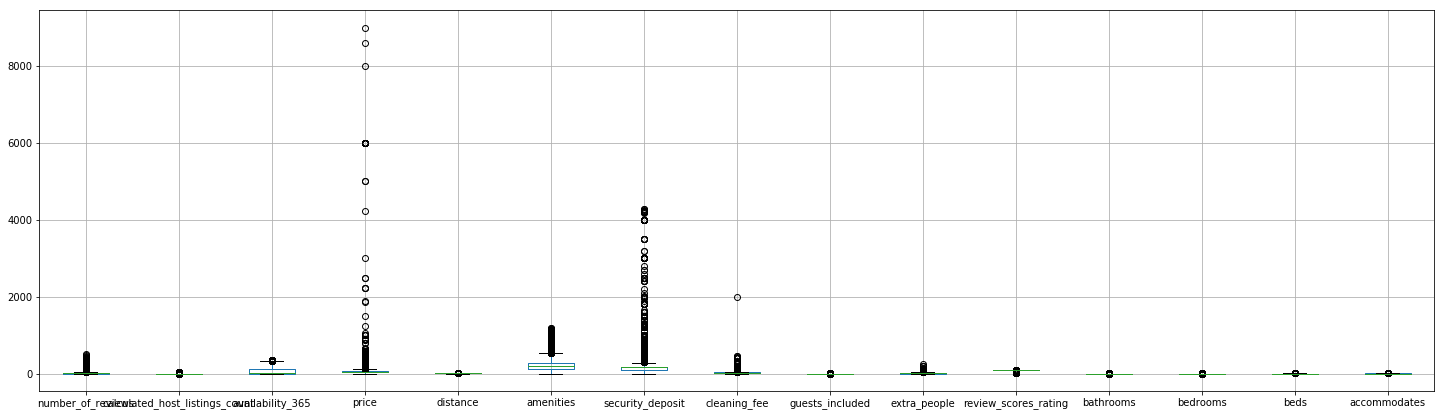

In [42]:
f, ax = plt.subplots(figsize=(25,7))
data.boxplot(ax=ax)
plt.show()

There is outlier data. We can clean it, but before cleaning, we need to determine if it is absolutely necessary.

We will not handle outlier data in this kernel.

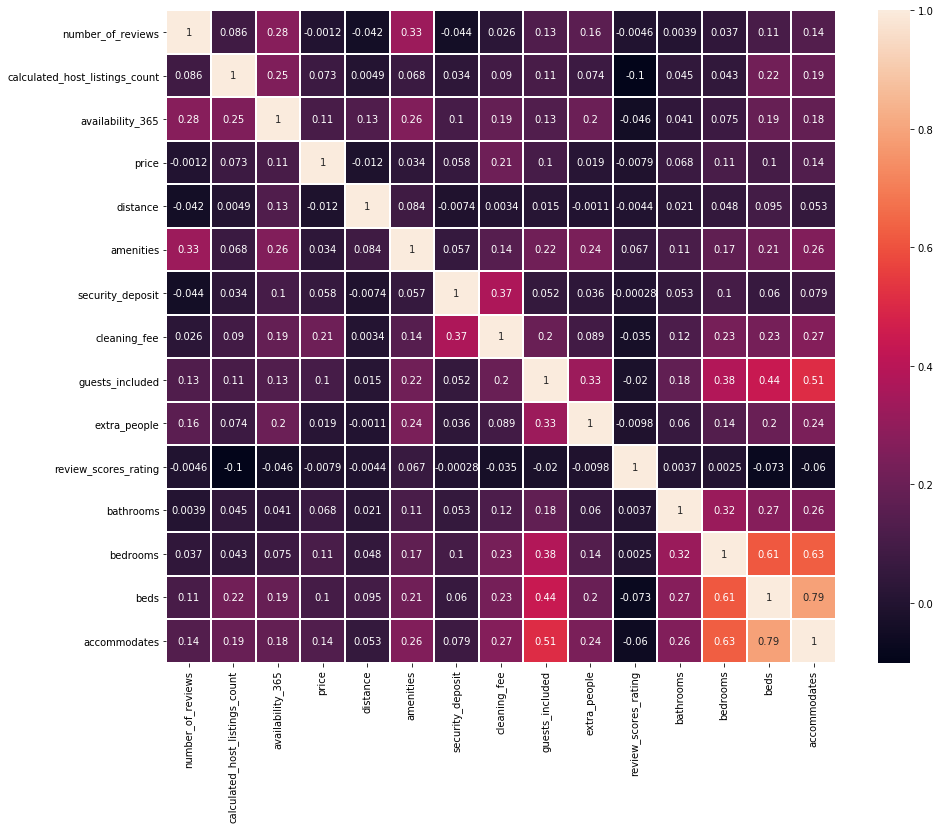

In [43]:
f, ax = plt.subplots( figsize=(15,12) )
sns.heatmap(data.corr(),annot=True,linewidths=1)
plt.show()

Nice correalation matrix. There is no too coraleted feature.

<h2>Modeling</h2>

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#split data test and train
X = dataset.drop(["price"],axis=1)
y = dataset["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [0]:
# normalize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [0]:
#Create Regression Model
from sklearn.tree import DecisionTreeRegressor
regr_tree = DecisionTreeRegressor()

In [48]:
#Search best parameters
from sklearn.model_selection import GridSearchCV
param_grid = [{'max_depth': np.arange(1, 10),
              'min_samples_leaf': [1, 5, 10, 20, 50, 100],
              'min_weight_fraction_leaf': [0.0,0.1,0.3,0.5],
              'random_state':[1,3,4,7]}]
gridCV = GridSearchCV(estimator=regr_tree, param_grid=param_grid,cv=10)
gridCV = gridCV.fit(X_train, y_train)
print(gridCV.best_score_)
print(gridCV.best_params_)

0.5845468888596332
{'max_depth': 3, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0, 'random_state': 1}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
md = gridCV.best_params_["max_depth"]
msl  = gridCV.best_params_["min_samples_leaf"]
mwfl = gridCV.best_params_["min_weight_fraction_leaf"]
rs = gridCV.best_params_["random_state"]

In [0]:
#fit model and prediction with best parameters
regr_tree = DecisionTreeRegressor(max_depth=md,min_samples_leaf=msl,min_weight_fraction_leaf=mwfl,random_state=rs)
regr_tree.fit(X_train, y_train)
tree_pred = regr_tree.predict(X_test)

In [51]:
#Measure error
from sklearn.metrics import mean_squared_error, r2_score
RMSE = np.sqrt(mean_squared_error(y_test, tree_pred))
print(f"RMSE: {round(RMSE, 4)}")

r2 = r2_score(y_test, tree_pred)
print(f"r2: {round(r2, 4)}")

RMSE: 44.4276
r2: 0.9413


In [0]:
import xgboost as xgb
# create a baseline
booster = xgb.XGBRegressor()

In [55]:
from sklearn.model_selection import GridSearchCV

# create Grid
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:38:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bytree': 1, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}


In [56]:
# instantiate xgboost with best parameters
booster = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                           max_depth=6, n_estimators=200, random_state=4)

# train
booster.fit(X_train, y_train)

# predict
y_pred_train = booster.predict(X_train)
y_pred_test = booster.predict(X_test)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:39:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [57]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: {round(RMSE, 4)}")
r2 = r2_score(y_test, y_pred_test)
r2
print(f"r2: {round(r2, 4)}")

RMSE: 82.4406
r2: 0.798
